## Use yfinance to Extract Tesla Stock Data

In [3]:
import yfinance as yf
import pandas as pd

#extract data on to create a ticker object.
tesla_ticker = yf.Ticker("TSLA")

#Set the period parameter to "max" so we get information for the maximum amount of time.
tesla_data = tesla_ticker.history(period="max")

# Display first 5 rows in tesla data
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


## Use Webscraping to Extract Tesla Revenue Data

In [5]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL of the webpage containing Tesla Revenue Data
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'

# Request the HTML data from the URL
response = requests.get(url)

# Save the HTML content to a variable
html_data = response.text  # or response.content if working with byte data


# Parse the HTML data with BeautifulSoup using 'html.parser'
soup = BeautifulSoup(html_data, 'html.parser')


# Extract the table using the read_html function
tables = pd.read_html(html_data)

# Identify the correct table (assuming it's the first one)
tesla_revenue = tables[0]

# Rename the columns to 'Date' and 'Revenue'
tesla_revenue.columns = ['Date', 'Revenue']

# Remove the comma and dollar signs from the 'Revenue' column
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].str.replace(',|\$', '', regex=True)

tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

# return the last 5 rows in tesla data
tesla_revenue.tail()

,Date,Revenue
8,2013,2013
9,2012,413
10,2011,204
11,2010,117
12,2009,112


## Use yfinance to Extract Stock The GameStop Data

In [6]:
#extract data on to create a ticker object.
gme_ticker= yf.Ticker("GME")

#Set the period parameter to "max" so we get information for the maximum amount of time.
gme_data= gme_ticker.history(period="max")

# Display first 5 rows in tesla data
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683251,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


## Use Webscraping to Extract GME Revenue Data

In [7]:
import requests

# URL of the webpage containing GME Revenue Data
url_gme = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html'

# Request the HTML data from the URL
response_gme = requests.get(url_gme)

# Save the HTML content to a variable
html_data_2 = response_gme.text  # or response_gme.content if working with byte data

from bs4 import BeautifulSoup

# Parse the HTML data with BeautifulSoup using 'html.parser'
soup_gme = BeautifulSoup(html_data_2, 'html.parser')

import pandas as pd

# Extract all tables in the HTML using the read_html function
tables_gme = pd.read_html(html_data_2)

# Identify the correct table (assuming it's the first table)
gme_revenue = tables_gme[0]

# Rename the columns to 'Date' and 'Revenue'
gme_revenue.columns = ['Date', 'Revenue']

# Remove the comma and dollar signs from the 'Revenue' column
gme_revenue['Revenue'] = gme_revenue['Revenue'].str.replace(',|\$', '', regex=True)

# Remove any null values
gme_revenue.dropna(inplace=True)

# Remove any empty strings
gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]

# return the last 5 rows in GME data 
gme_revenue.tail()

,Date,Revenue
11,2009,8806
12,2008,7094
13,2007,5319
14,2006,3092
15,2005,1843


## function to graph the Tesla Stock Data and the game stop stock, also provide a title for the graph 

In [11]:
import matplotlib.pyplot as plt
def make_graph(stock_data, revenue_data, stock_name):
    fig, ax1 = plt.subplots(figsize=(10, 5))

    # Plot stock data
    ax1.plot(stock_data['Date'], stock_data['Close'], color='blue', label=f'{stock_name} Stock Price')
    ax1.set_xlabel('Date')
    ax1.set_ylabel(f'{stock_name} Stock Price', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.set_title(f'{stock_name} Stock Price and Revenue over Time')

    # Set date ticks
    ax1.xaxis.set_major_locator(plt.MaxNLocator(10))  # Adjust tick frequency

    # Create a second y-axis for revenue data
    ax2 = ax1.twinx()
    ax2.plot(revenue_data['Date'], revenue_data['Revenue'], color='green', label=f'{stock_name} Revenue')
    ax2.set_ylabel(f'{stock_name} Revenue (in millions)', color='green')
    ax2.tick_params(axis='y', labelcolor='green')

    # Show the plot
    plt.show()
    # Assuming tesla_data is a DataFrame with Tesla stock data and 'Date' & 'Close' columns


##  GameStop Graph

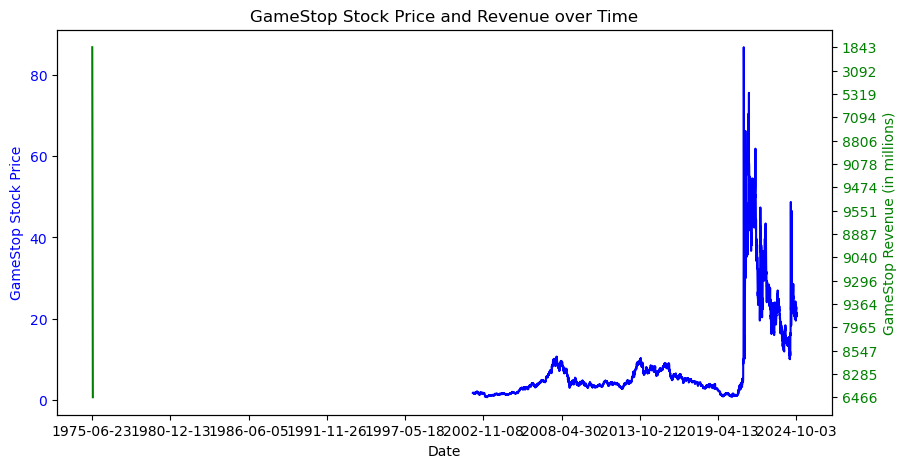

In [13]:
# Call the make_graph function for GameStop

make_graph(gme_data, gme_revenue, 'GameStop')

##  Tesla Graph

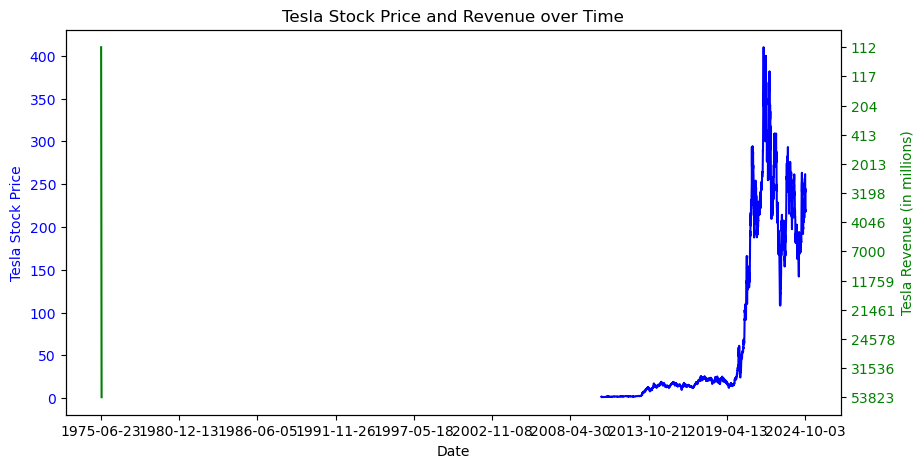

In [15]:
make_graph(tesla_data, tesla_revenue, 'Tesla')